In [29]:
print('hello')

hello


In [30]:
import pandas as pd

In [31]:
df = pd.read_csv('/Users/harshit/Downloads/Research-Commons-Quant/ARIMA-modelling/dataset/btc.csv')

In [32]:
df.head()

,timestamp,symbol,base,market_venue,open,high,low,close,volume,trades,vwap
0,2022-07-27 00:00:00,BTC,USDT,BINANCE,21459.43,23112.63,21421.02,22952.45,120859.26615,2895679,22320.25
1,2022-07-28 00:00:00,BTC,USDT,BINANCE,22954.31,24199.72,22582.13,23842.93,321246.06648,9102640,23266.60
2,2022-07-29 00:00:00,BTC,USDT,BINANCE,23845.25,24442.66,23414.03,23773.75,198238.52330,6218869,23871.89
3,2022-07-30 00:00:00,BTC,USDT,BINANCE,23777.28,24668.00,23502.25,23643.51,151060.13211,4801528,24060.42
4,2022-07-31 00:00:00,BTC,USDT,BINANCE,23644.64,24194.82,23227.31,23293.32,127742.83335,4463704,23707.08


In [33]:
# selecting close price for modelling
close_price = df['close']

In [34]:
close_price

0      22952.45
1      23842.93
2      23773.75
3      23643.51
4      23293.32
         ...   
565    52137.67
566    51774.73
567    52258.82
568    51849.39
569    51811.07
Name: close, Length: 570, dtype: float64

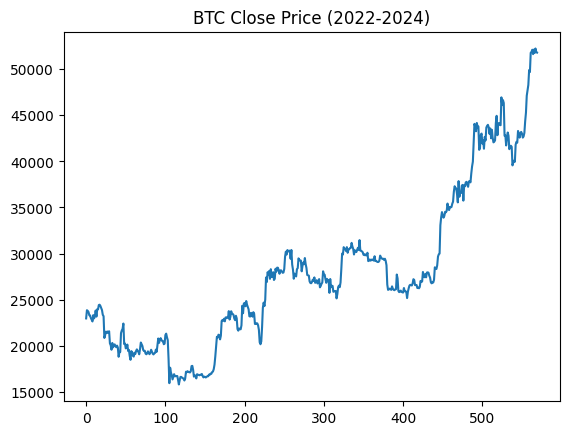

In [35]:
# plotting for close price
import matplotlib.pyplot as plt
close_price.plot(title='BTC Close Price (2022-2024)')
plt.show()

In [36]:
# check for stationarity
from statsmodels.tsa.stattools import adfuller

# ADF test on close price
result = adfuller(close_price)
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: 1.0222105735178815
p-value: 0.9944948548503696


In [37]:
# First differencing
close_diff = close_price.diff().dropna()

# Perform ADF test again to check if the series is stationary after differencing
from statsmodels.tsa.stattools import adfuller

result_diff = adfuller(close_diff)
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])

ADF Statistic (Differenced): -15.965779671527654
p-value (Differenced): 7.094875329018958e-29


In [38]:
# Second differencing
close_diff2 = close_diff.diff().dropna()

# Perform ADF test again to check stationarity
result_diff2 = adfuller(close_diff2)
print('ADF Statistic (Second Differenced):', result_diff2[0])
print('p-value (Second Differenced):', result_diff2[1])

ADF Statistic (Second Differenced): -10.691308736569516
p-value (Second Differenced): 3.719850272824589e-19


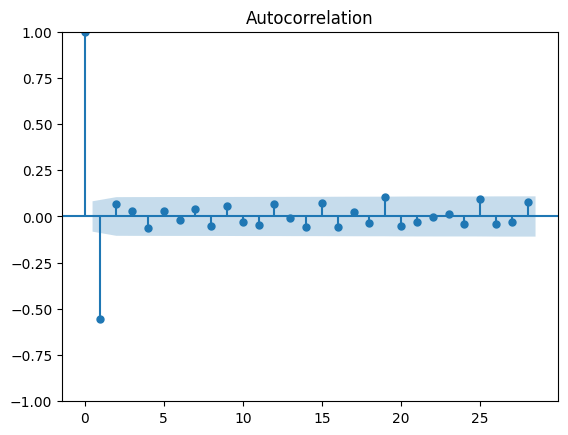

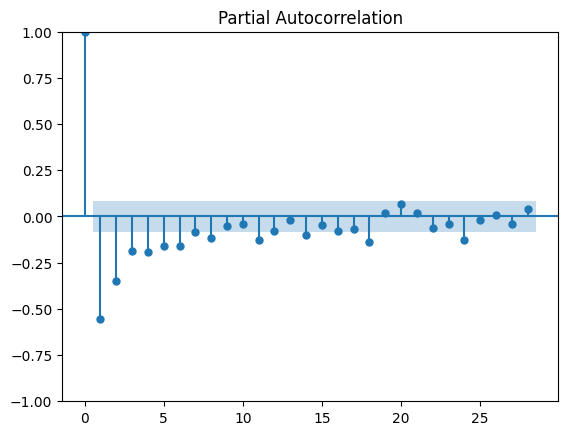

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# plot ACF and PACF for the differenced data
plot_acf(close_diff2)
plot_pacf(close_diff2)
plt.show()

ARIMA(1,2,1) AIC: 9123.906144945406


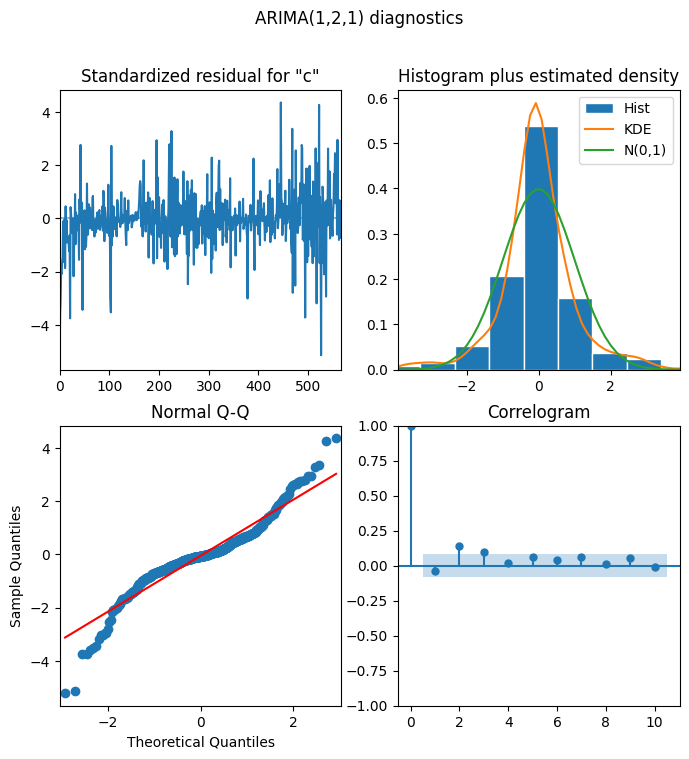

ARIMA(2,2,1) AIC: 9124.28940768755


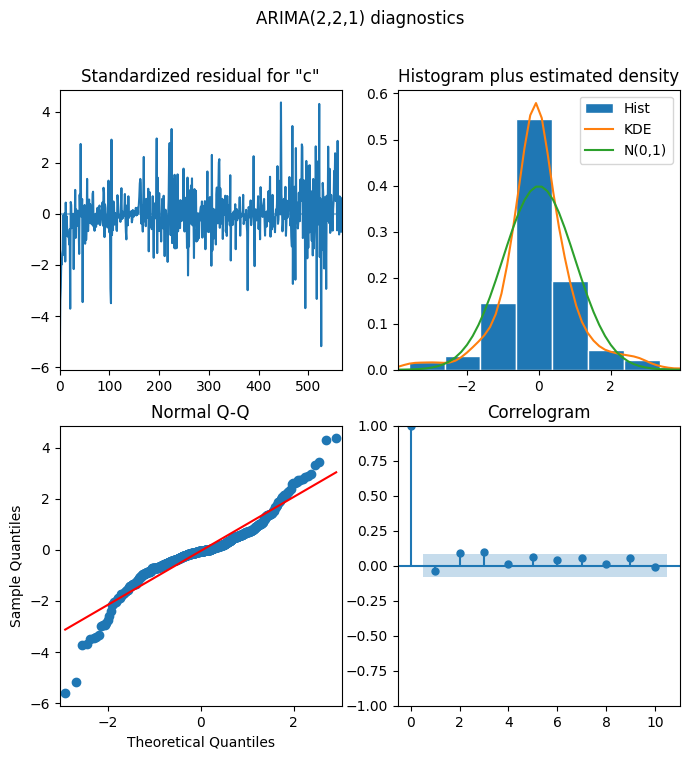

In [43]:
from statsmodels.tsa.arima.model import ARIMA

for p in [1,2]:
    model = ARIMA(close_price, order=(p,2,1)).fit()
    print(f'ARIMA({p},2,1) AIC:', model.aic)
    model.plot_diagnostics(figsize=(8,8))
    plt.suptitle(f'ARIMA({p},2,1) diagnostics')
    plt.show()